In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [57]:
df = pd.read_excel('1553768847_housing.xlsx')

In [58]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [60]:
df.shape

(20640, 10)

In [61]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

<Figure size 640x480 with 0 Axes>

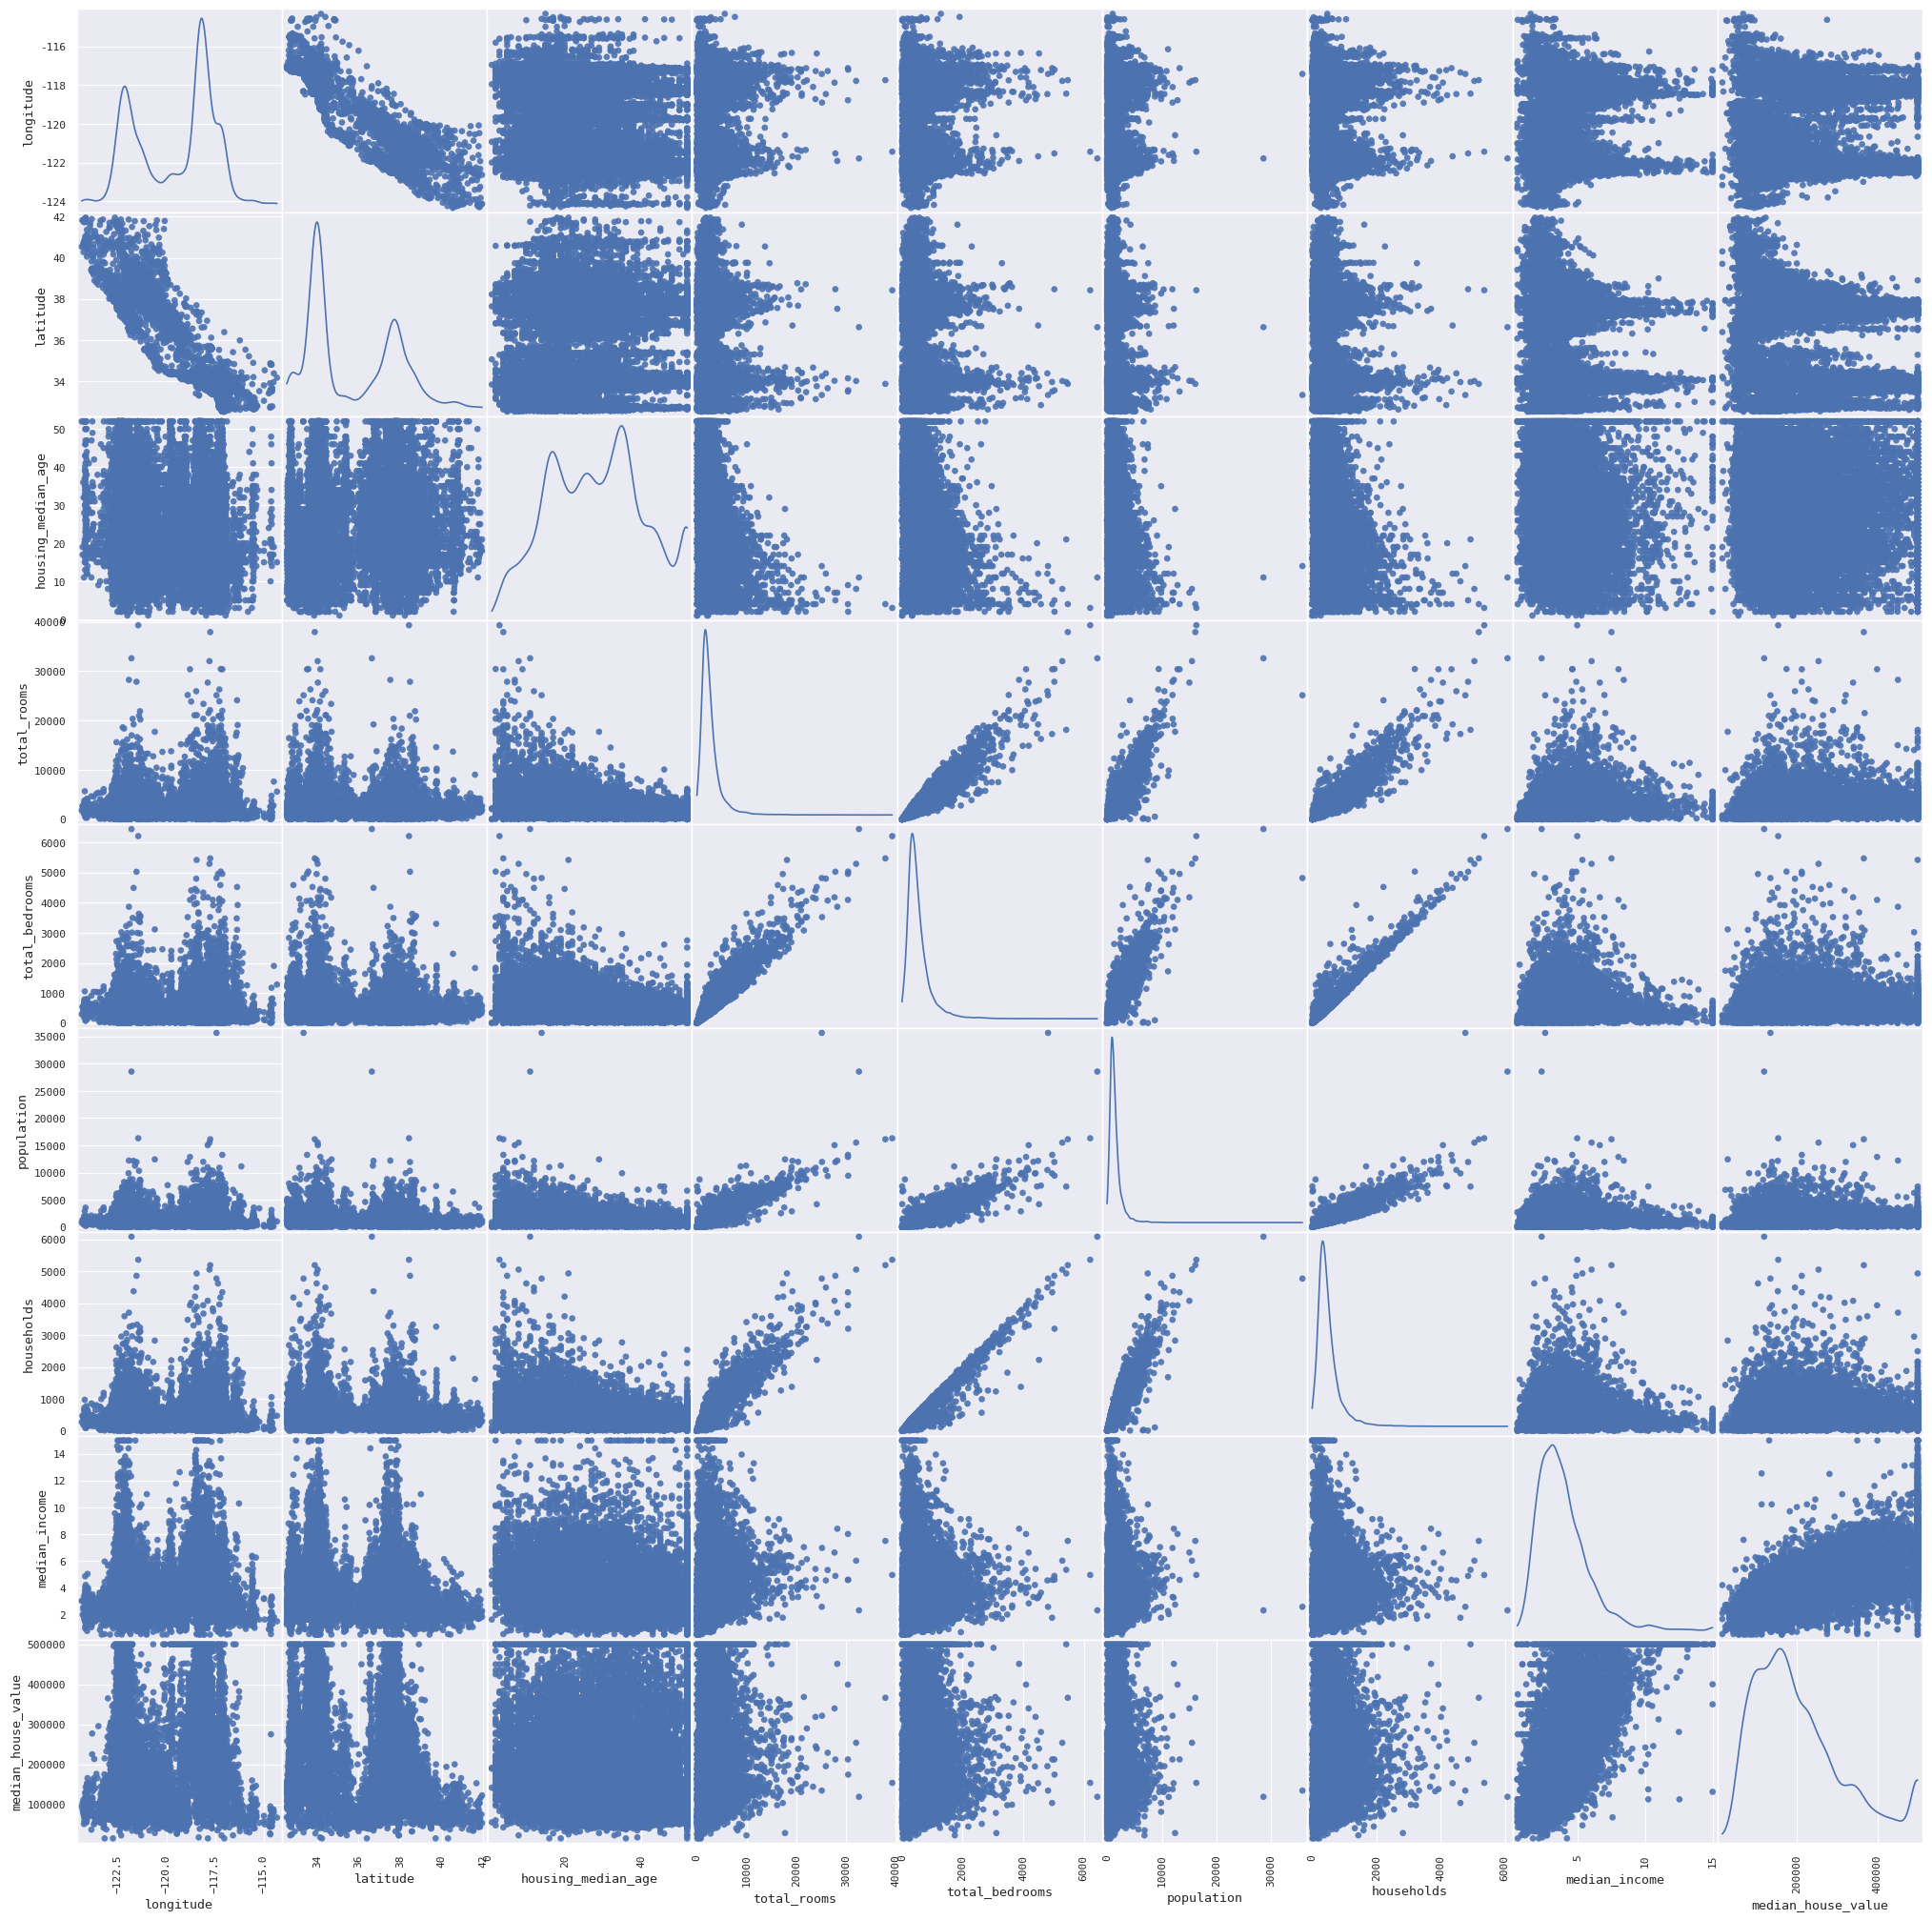

In [62]:
#display scatter_matrix also
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

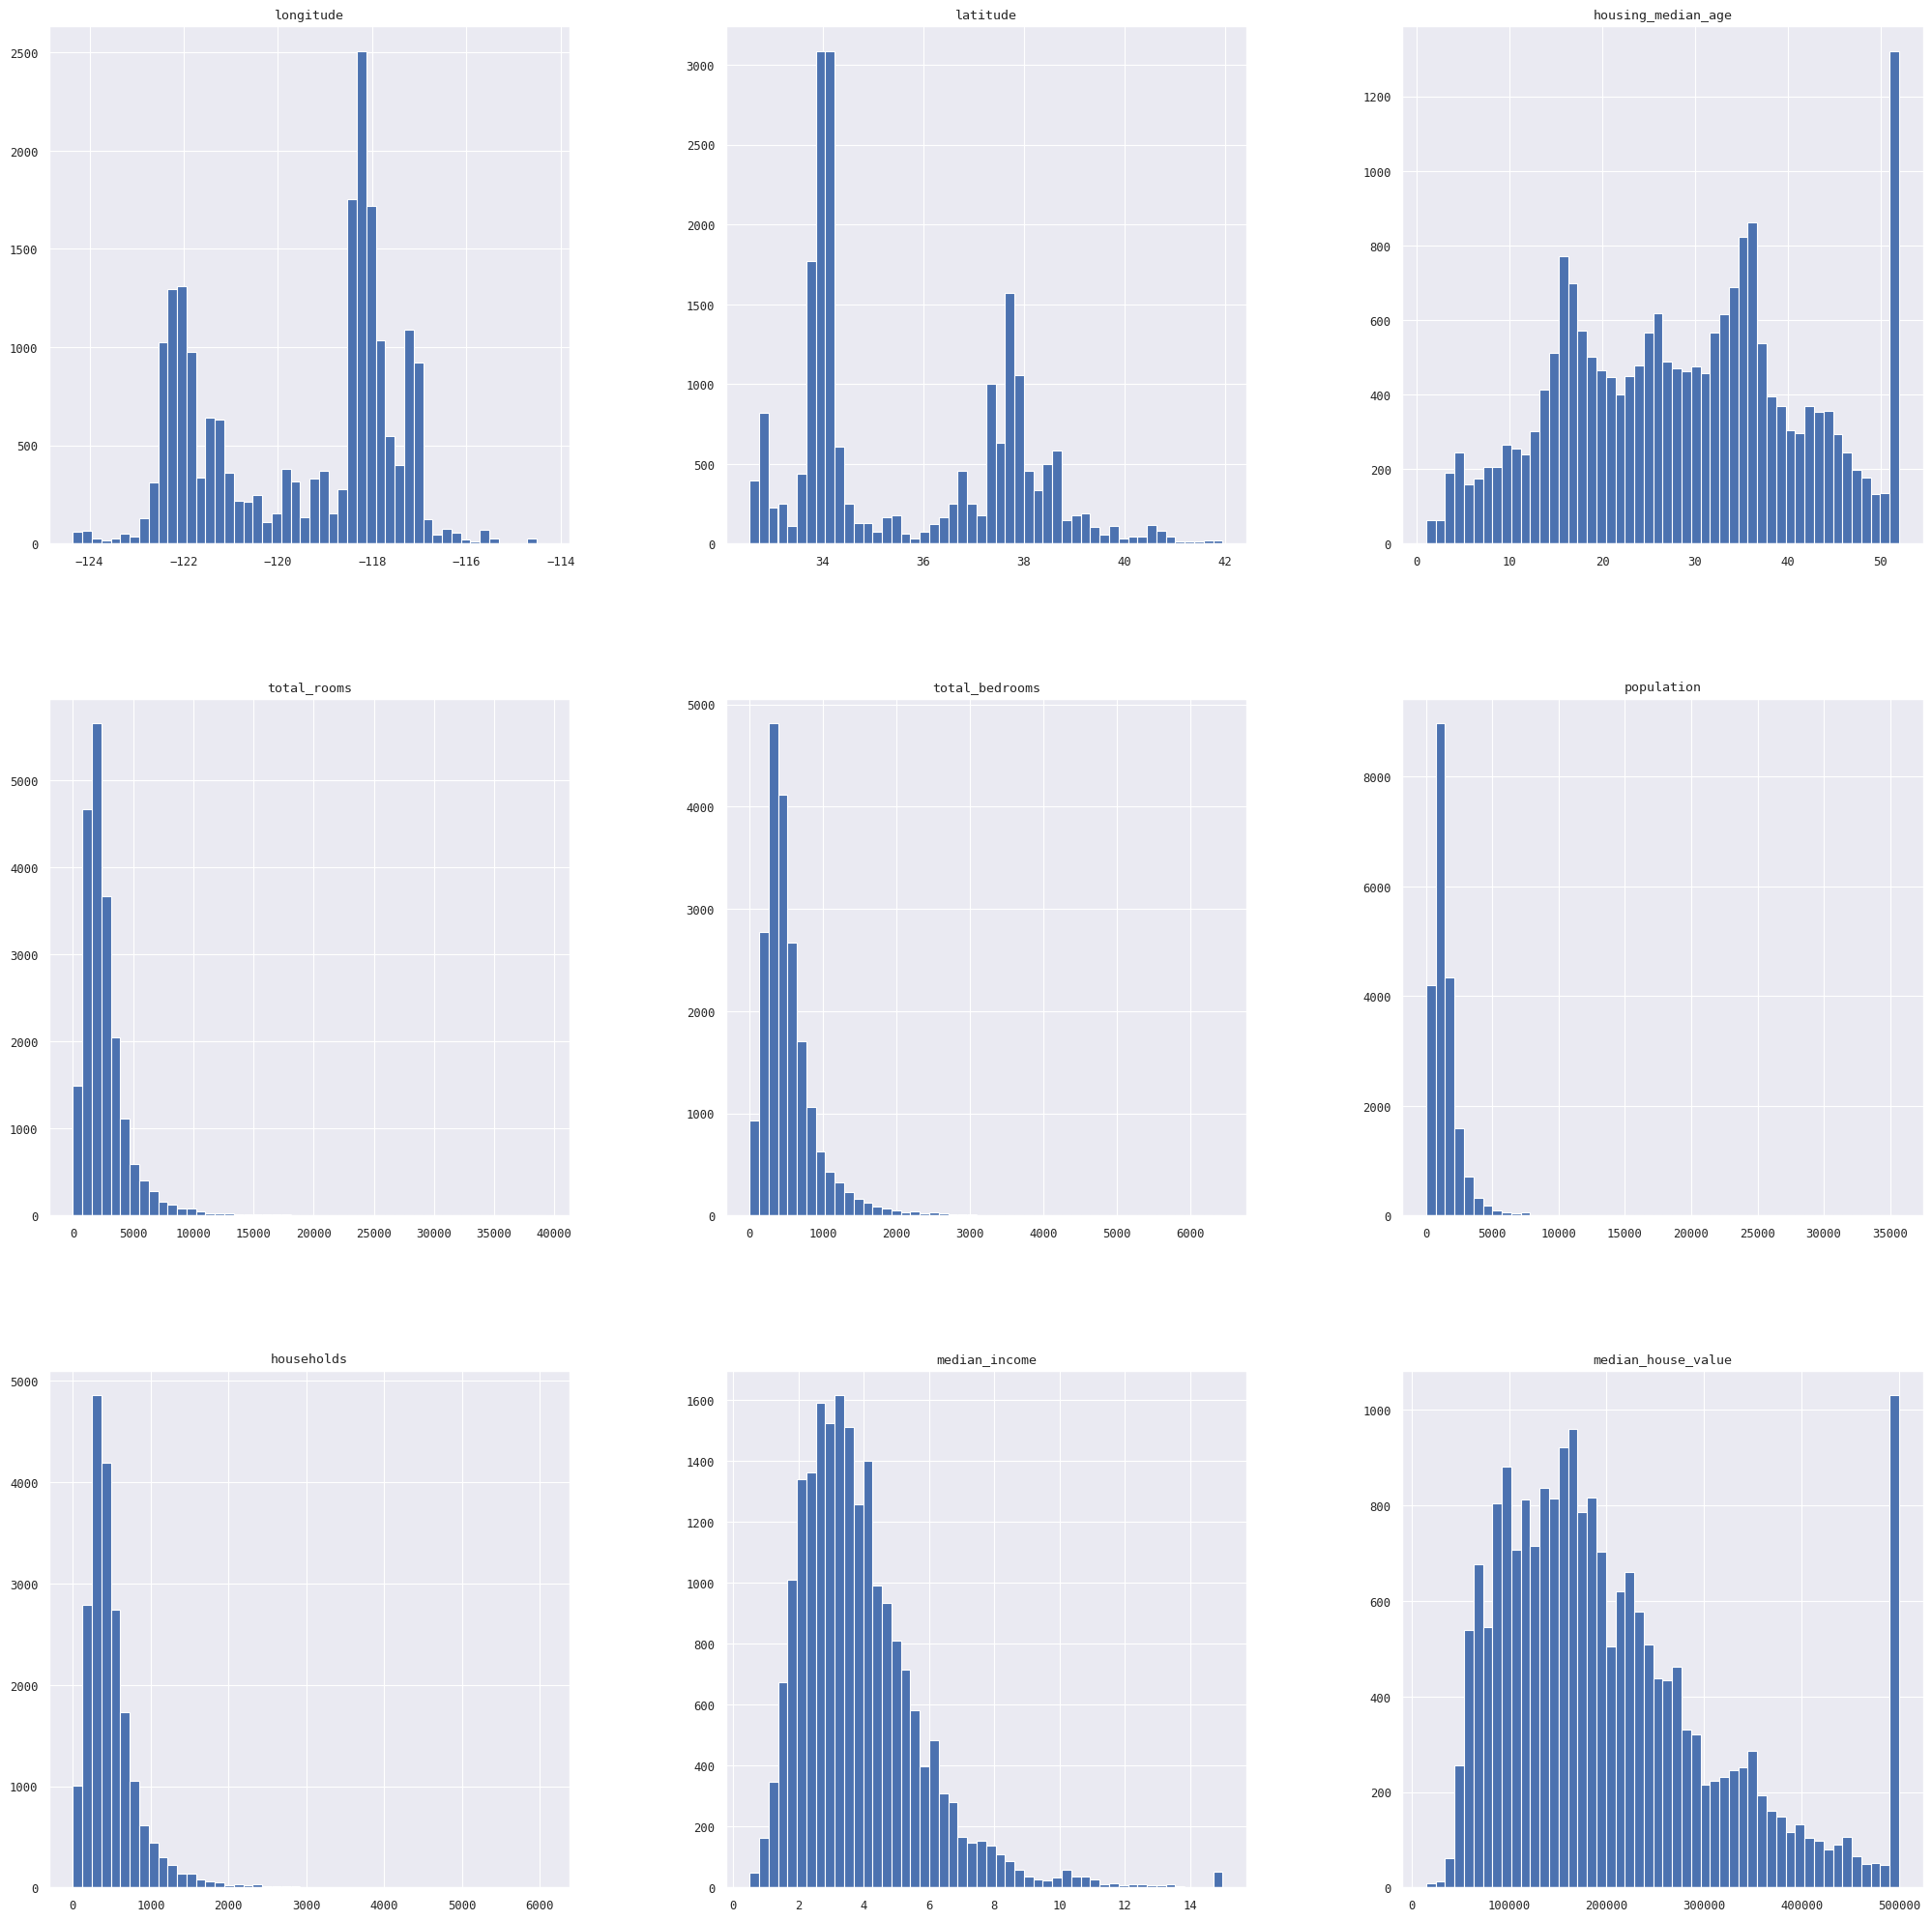

In [63]:
df.hist(figsize=(25,25),bins=50)

In [64]:
housingcorr=df.corr()
housingcorr.style.background_gradient()

C:\Users\User\AppData\Local\Temp\ipykernel_2760\3089965108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housingcorr=df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_2760\2006374832.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housingcorr=df.corr()


<AxesSubplot: >

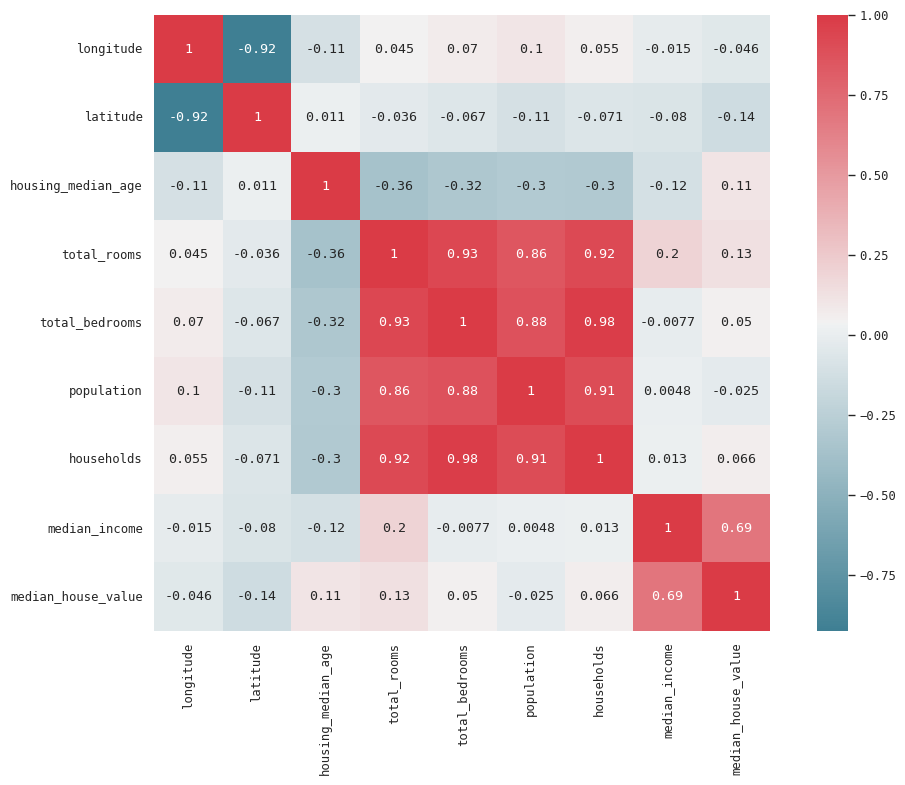

In [65]:
sns.set(context = 'paper',font='monospace')
housingcorr=df.corr()
fig,axe=plt.subplots(figsize=(12,8))
cmap=sns.diverging_palette(220,10,center='light',as_cmap=True)
sns.heatmap(housingcorr,vmax=1,square=True,cmap=cmap,annot=True)

In [66]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desPairs['25']]
    Q3 = des[desPairs['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    #b = df[(df['a'] > 1) & (df['a'] < 5)]
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("Outliers out of total = {} are \n {}".format(df[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = df[~df[column].isin(data[column])]
    return outlierRemoved

In [67]:
#get the outlier
df_outliersRemoved = getOutliers(df,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


In [68]:
# Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [69]:
print(df.iloc[:,4:5].head())
imputer = SimpleImputer(missing_values=np.nan,strategy ="median")
imputer.fit(df.iloc[:,4:5])
df.iloc[:,4:5] = imputer.transform(df.iloc[:,4:5])
df.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [70]:
# Convert categorical column to numerical data using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [72]:
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']

# Split the dataset : Split the data into 80% training dataset and 20% test dataset.

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
# Print the shapes of the train and test datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (16512, 13)
X_test shape: (4128, 13)
Y_train shape: (16512,)
Y_test shape: (4128,)


# Standardize data :Standardize training and test datasets.

In [75]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [76]:
# Standardize the training dataset
X_train = X_scaler.fit_transform(X_train)
Y_train = Y_scaler.fit_transform(Y_train.values.reshape(-1,1))

In [77]:
# Standardize the test dataset
X_test = X_scaler.transform(X_test)
Y_test = Y_scaler.transform(Y_test.values.reshape(-1,1))



In [78]:
# Print the standardized data
print("X_train:\n", X_train)
print("Y_train:\n", Y_train)
print("X_test:\n", X_test)
print("Y_test:\n", Y_test)


X_train:
 [[ 1.27258656 -1.3728112   0.34849025 ... -0.01556621 -0.35564565
   2.62975816]
 [ 0.70916212 -0.87669601  1.61811813 ... -0.01556621 -0.35564565
   2.62975816]
 [-0.44760309 -0.46014647 -1.95271028 ... -0.01556621 -0.35564565
   2.62975816]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ... -0.01556621 -0.35564565
  -0.3802631 ]
 [-1.18553953  0.90651045 -1.07984112 ... -0.01556621 -0.35564565
  -0.3802631 ]
 [-1.41489815  0.99543676  1.85617335 ... -0.01556621  2.81178749
  -0.3802631 ]]
Y_train:
 [[-0.90118909]
 [ 1.5127714 ]
 [-0.29921255]
 ...
 [ 0.12891731]
 [ 0.65997132]
 [ 1.01890847]]
X_test:
 [[ 0.28534728  0.1951     -0.28632369 ... -0.01556621 -0.35564565
  -0.3802631 ]
 [ 0.06097472 -0.23549054  0.11043502 ... -0.01556621 -0.35564565
  -0.3802631 ]
 [-1.42487026  1.00947776  1.85617335 ... -0.01556621  2.81178749
  -0.3802631 ]
 ...
 [-1.23041404  0.78014149 -0.28632369 ... -0.01556621 -0.35564565
  -0.3802631 ]
 [-0.08860699  0.52740357  0.58654547 ... -0.01556621 

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
# Perform linear regression on the training data
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [81]:
# Predict the output for the test dataset using the fitted model
y_pred = regressor.predict(X_test)

# Compute the root mean squared error (RMSE) from linear regression
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6059608800566908


In [83]:
print("Intercept is "+str(regressor.intercept_))
print("coefficients  is "+str(regressor.coef_))

Intercept is [-2.69348152e-06]
coefficients  is [[-4.65444745e-01 -4.70502484e-01  1.20133232e-01 -1.13251811e-01
   3.72524525e-01 -3.75399543e-01  1.58959426e-01  6.50126877e-01
   3.91052230e+10  3.66037719e+10  1.22468961e+09  2.48451162e+10
   2.61444147e+10]]


In [104]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


# Perform Linear Regression with one independent variable :

# 1.Extract just the median_income column from the independent variables (from X_train and X_test)

In [108]:
# Extract just the median_income column from the independent variables
# X_train_median_income = X["median_income"]
# X_test_median_income = X_test[["median_income"]]
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]
print(dropcol)
housing_median_income = X.drop(dropcol,axis=1)
print(type(housing_med))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
<class 'pandas.core.frame.DataFrame'>


In [110]:
#X_train2,X_test2,Y_train2,Y_test2=train_test_split(housing_median_income,Y,test_size=0.2,randomstate=42)
X_train2,X_test2,y_train2,y_test2 = train_test_split(housing_median_income,Y,test_size=0.2,random_state=42)

In [112]:
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("Y_train shape:", y_train2.shape)
print("Y_test shape:", y_test2.shape)

X_train shape: (16512, 1)
X_test shape: (4128, 1)
Y_train shape: (16512,)
Y_test shape: (4128,)


In [113]:
print("X_train shape:", X_train2.size)
print("X_test shape:", X_test2.size)
print("Y_train shape:", y_train2.size)
print("Y_test shape:", y_test2.size)

X_train shape: 16512
X_test shape: 4128
Y_train shape: 16512
Y_test shape: 4128


In [114]:
# Perform linear regression on the training data
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

In [115]:
y_pred2 = regressor2.predict(X_test2)
print(len(y_pred2))
print(len(y_test2))
print(y_pred2[0:5])
print(y_test2[0:5])

4128
4128
[114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_2760\2842832808.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test2[0:5])


Text(0, 0.5, ' Predicted median_house_value')

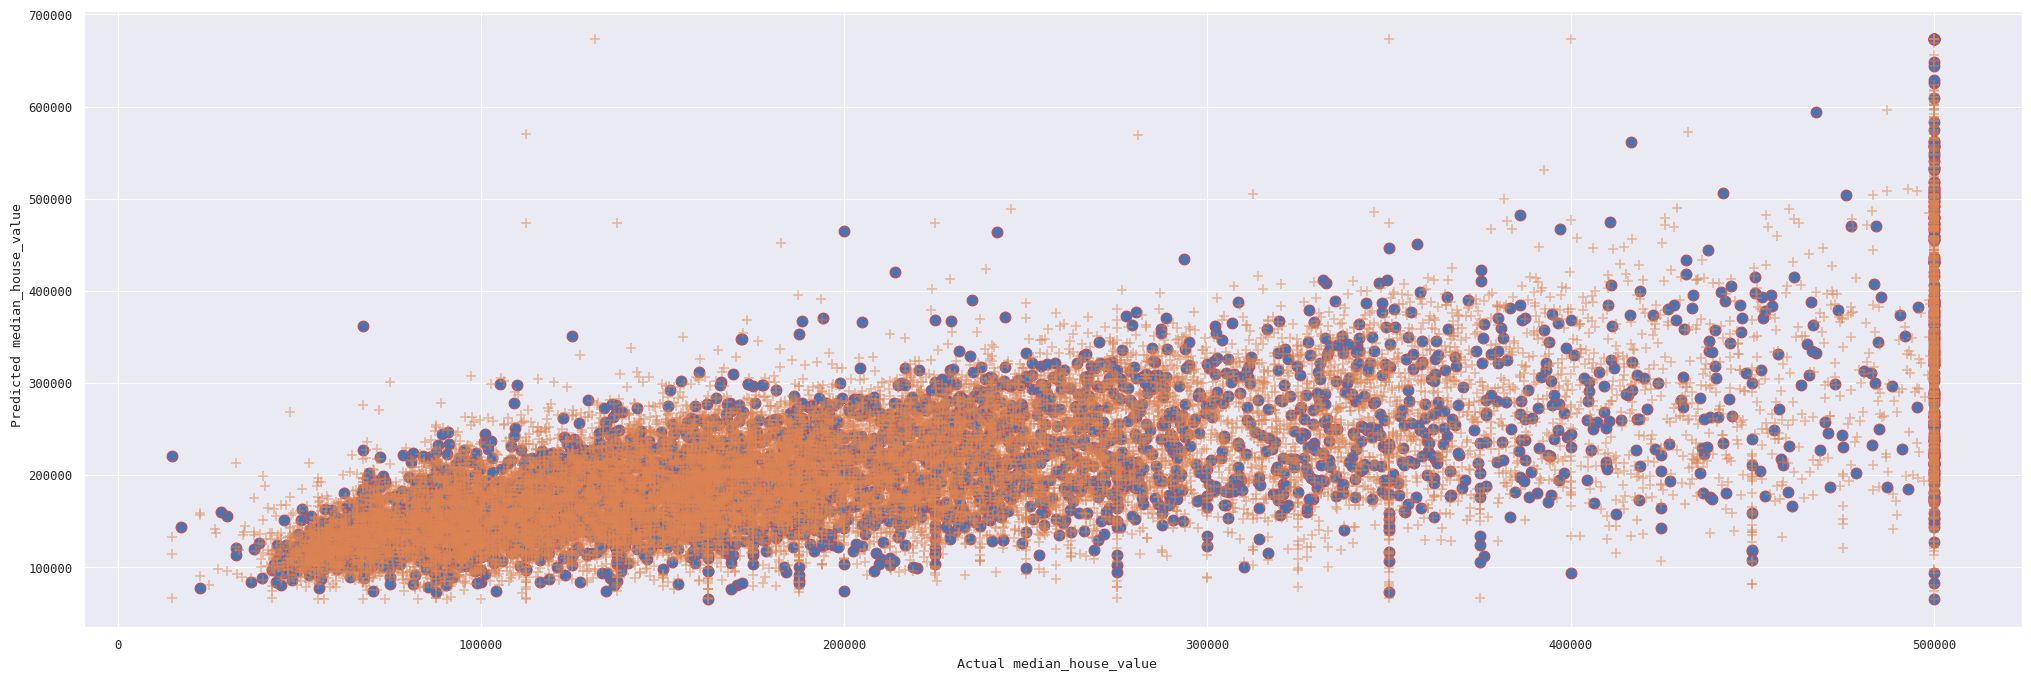

In [116]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,regressor2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")